In [87]:
## Phase Corrections in Time-series Domain shown in map/point view

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from pysar.simulation.plot import *
from pysar.utils import ptime, readfile, writefile, utils as ut, network as pnet, plot as pp
from pysar.objects import timeseries, sensor


work_dir = '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

m_date = '20150927'
s_date = '20160512'

lat, lon = -1.0352, -91.1917

out_file = '{}_phaseCorrection_map.png'.format(proj_name)
wrap_range = [-1*np.pi, np.pi]

atr = readfile.read_attribute('geo_velocity.h5')
geo_box = (-91.60, 0.18, -90.78, -1.07)   #(W, N, E, S)
coord = ut.coordinate(atr)
pix_box = coord.box_geo2pixel(geo_box)

mask = readfile.read('maskIsabela.h5', box=pix_box)[0]
ref_y, ref_x = int(atr['REF_Y']), int(atr['REF_X'])
ref_lat, ref_lon = float(atr['REF_LAT']), float(atr['REF_LON'])
dem = pp.read_dem('demIsabela.h5', pix_box=None, geo_box=geo_box, print_msg=False)[0]

pha = []
ts_files = ['geo_timeseries.h5', 
            'geo_timeseries_ECMWF.h5', 
            'geo_timeseries_ECMWF_demErr.h5', 
            'geo_timeseries_ECMWF_demErr_refDate_ramp.h5']

ts_files = ['geo_timeseries.h5', 
            'ECMWF.h5', 
            'demErr.h5',
            'ramp.h5',
            'geo_timeseries_ECMWF_demErr_refDate_ramp.h5']
for fname in ts_files:
    data  = readfile.read(fname, datasetName=s_date, box=pix_box)[0]
    data -= readfile.read(fname, datasetName=m_date, box=pix_box)[0]
    data *= 100.
    data[mask==0] = np.nan
    data = ut.wrap(data)
    pha.append(data)
print('Done.')

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE
reading timeseries data from file: geo_timeseries.h5 ...
reading timeseries data from file: geo_timeseries.h5 ...
reading timeseries data from file: ECMWF.h5 ...
reading timeseries data from file: ECMWF.h5 ...
reading timeseries data from file: demErr.h5 ...
reading timeseries data from file: demErr.h5 ...
reading timeseries data from file: ramp.h5 ...
reading timeseries data from file: ramp.h5 ...
reading timeseries data from file: geo_timeseries_ECMWF_demErr_refDate_ramp.h5 ...
reading timeseries data from file: geo_timeseries_ECMWF_demErr_refDate_ramp.h5 ...
Done.


save to file: GalapagosSenDT128_phaseCorrection_map.png


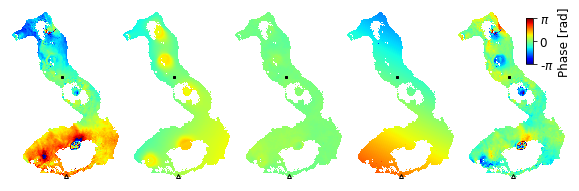

In [95]:
## Map View

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=[10, 4], sharex=True, sharey=True)
inps = pp.cmd_line_parse()
inps.disp_dem_contour = False
disp_dem = False

title_list = ['Raw', 'Raw - Trop', 'Raw - Trop - Topo', 'Raw - Trop - Topo - Ramp']
num_list = ['(a)', '(b)', '(c)', '(d)', '(e)']
for i in range(len(pha)):
    m = pp.BasemapExt(llcrnrlon=geo_box[0], llcrnrlat=geo_box[3],
                      urcrnrlon=geo_box[2], urcrnrlat=geo_box[1],
                      projection='cyl',
                      resolution='i', area_thresh=1.,
                      suppress_ticks=False, ax=ax[i])
    alpha = 1.0
    if disp_dem:
        m = pp.plot_dem_background(ax=m, geo_box=geo_box, dem=dem, inps=inps, print_msg=False)
    im = m.imshow(pha[i], origin='upper', interpolation='nearest',
                  vmin=wrap_range[0], vmax=wrap_range[1], cmap='jet', alpha=alpha)
    ax[i].plot(ref_lon, ref_lat, 'ks', ms=2)  #reference point
    ax[i].plot(lon, lat, "k^", mfc='none', mew=1., ms=4)  #point of interest
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    ax[i].axis('off')
    #ax[i].set_title(title_list[i], fontsize=font_size)
    #ax[i].annotate(num_list[i], xy=(0.45, 0.95), color='k', xycoords='axes fraction', fontsize=font_size)

fig.subplots_adjust(wspace=0.0)
# colorbar
cax = fig.add_axes([0.84, 0.61, 0.01, 0.16])
cbar = plt.colorbar(im, cax=cax, ticks=[wrap_range[0], 0, wrap_range[1]])
cbar.ax.set_yticklabels([r'-$\pi$', '0', r'$\pi$'])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('Phase [rad]', fontsize=font_size)

plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()

reading timeseries data from file: geo_timeseries_ECMWF_demErr_refDate_ramp.h5 ...
reading timeseries data from file: ramp.h5 ...
reading timeseries data from file: demErr.h5 ...
reading timeseries data from file: ECMWF.h5 ...
reading timeseries data from file: geo_timeseries.h5 ...
save to file: GalapagosSenDT128_phaseCorrection_point.jpg


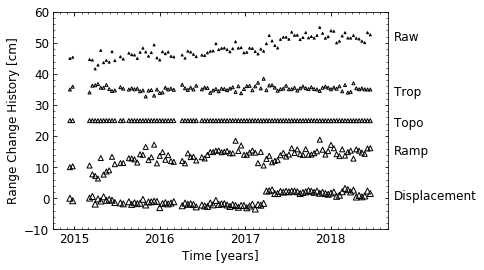

In [96]:
## Point View
from dateutil.relativedelta import relativedelta
marker_size = 6

#work_dir = '~/insarlab/Galapagos/GalapagosAlosAT133/PYSAR'
#lalo = ' --lalo -0.9275 -91.2709 --off 100 --ylim -50 450'

work_dir = '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE'
lalo = ' --lalo {} {} --off 10 --ylim -10 50'.format(lat, lon)

ts_files = ['geo_timeseries.h5', 
            'geo_timeseries_ECMWF.h5', 
            'geo_timeseries_ECMWF_demErr.h5', 
            'geo_timeseries_ECMWF_demErr_refDate_ramp.h5']
labels = ['Raw', 
          'Raw - Trop', 
          'Raw - Trop - Topo', 
          'Raw - Trop - Topo - Ramp']

ts_files = ['geo_timeseries.h5', 
            'ECMWF.h5', 
            'demErr.h5',
            'ramp.h5',
            'geo_timeseries_ECMWF_demErr_refDate_ramp.h5']
labels = ['Raw', 'Trop', 'Topo', 'Ramp', 'Displacement']
offset = [45, 35, 25, 10, 0]


## Option 1 - call tsview.py to plot
cmd = 'tsview.py '
for fname in ts_files:
    cmd += ' {}'.format(fname)
cmd += ' --zf --wrap --wrap-range -5 5 {}'.format(lalo)
cmd += ' --nodisplay'
#print(cmd)
#os.system(cmd)

## Option 2 - call functions
obj = timeseries(ts_files[0])
obj.open(print_msg=False)
dates = ptime.date_list2vector(obj.dateList)[0]
coord = ut.coordinate(obj.metadata)
y, x = coord.geo2radar(lat, lon)[0:2]
box = (x, y, x+1, y+1)

num_file = len(ts_files)
ms_step = 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ts_data = []
for i in range(num_file-1, -1, -1):
    d_ts = np.squeeze(readfile.read(ts_files[i], box=box)[0]) * 100.
    d_ts -= d_ts[0]
    d_ts += offset[i]

    ms = marker_size - ms_step * (num_file - 1 - i)
    ax.scatter(dates, d_ts, marker='^', s=ms**2, label=labels[i],
               facecolors='none', edgecolors='k', linewidth=1.)

    ax.annotate(labels[i], xy=(1.02, d_ts[-1]-2),
                xycoords=ax.get_yaxis_transform(),  # y in data untis, x in axes fraction
                color='k', fontsize=font_size)

ax.tick_params(which='both', direction='in', labelsize=font_size,
               bottom=True, top=True, left=True, right=True)
ax, t0, t1 = pp.auto_adjust_xaxis_date(ax, obj.yearList, fontsize=font_size)
ax.set_xlabel('Time [years]', fontsize=font_size)
ax.set_ylabel('Range Change History [cm]', fontsize=font_size)
ax.set_ylim(-10, 60)
ax.set_xlim(t0+relativedelta(months=2), t1)
ax.yaxis.set_minor_locator(AutoMinorLocator())

out_file = '{}_phaseCorrection_point.jpg'.format(proj_name)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()